In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [2]:
dataEDA = pd.read_csv("online_shoppers_intention_1.csv")

In [3]:
dataEDA.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


C:\Users\neera\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\neera\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



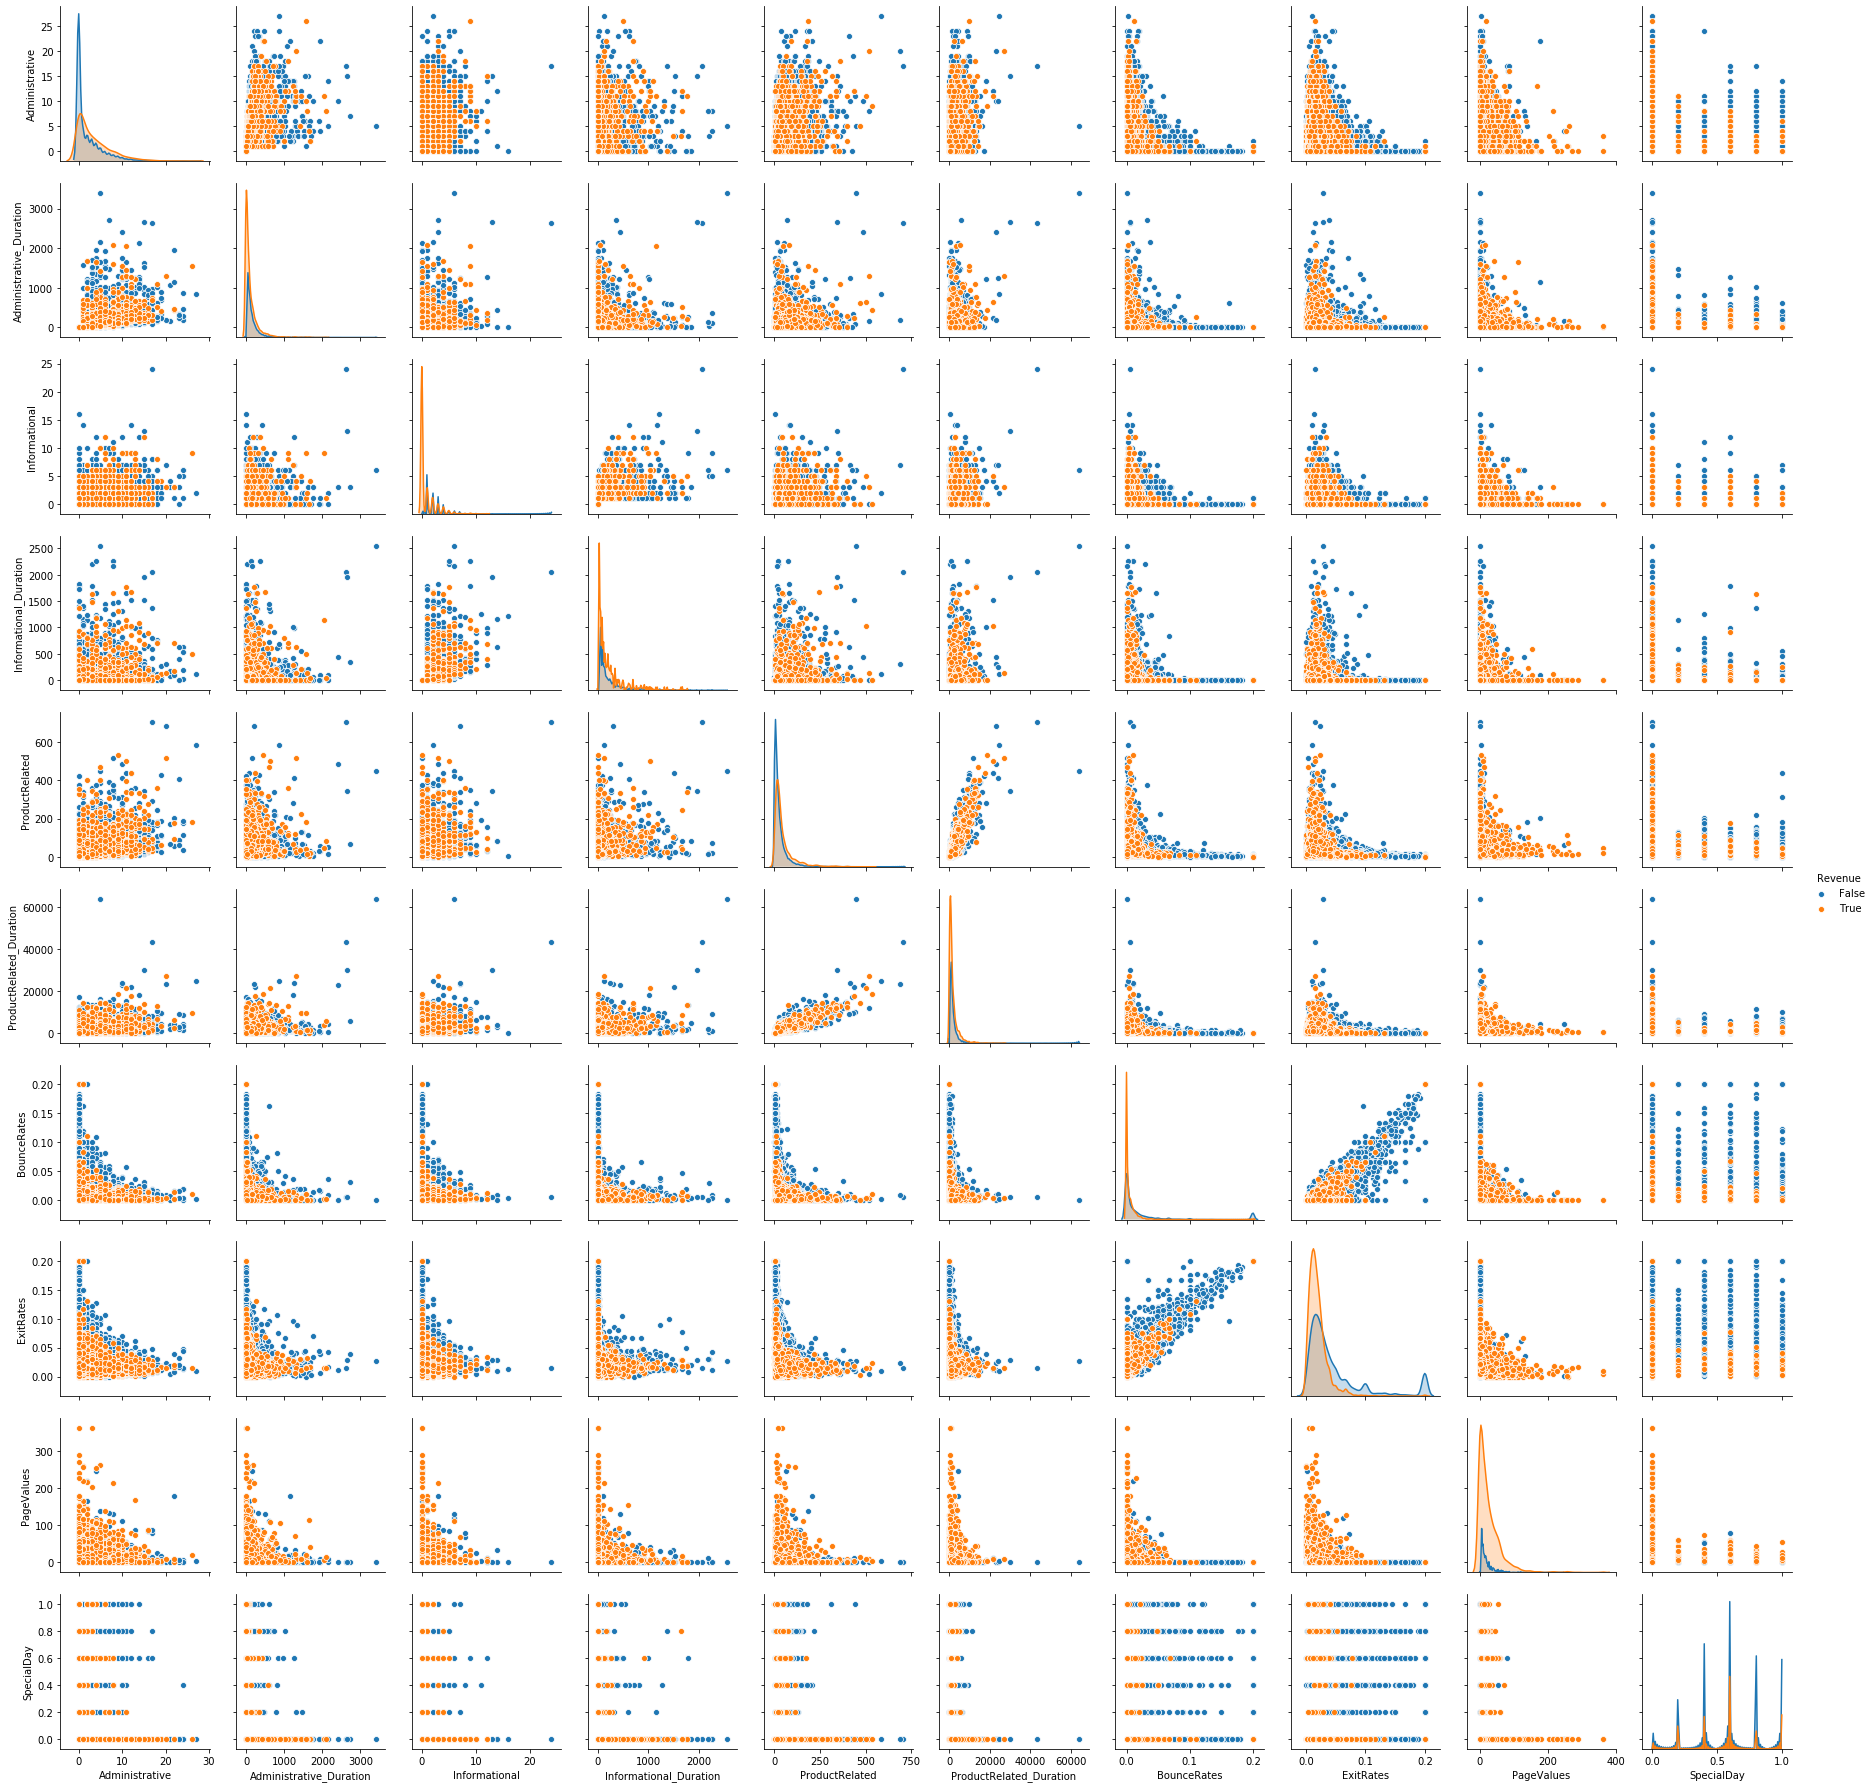

In [5]:
sns.pairplot(dataEDA, vars = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],hue = 'Revenue')

#Inferences from pair wise plots below
#1) These is positive correlation between BounceRates and ExitRates. 
#Customers with low BounceRates and low ExitRates made the purchase.
#2) If the page value is less 100, users are more likely to make the purchase.
#3) ExitRates and BounceRates are less from ProductRelated page as compared to Administrative and informational.
#4) Special Day is not having much affect on customer's purchase intension.

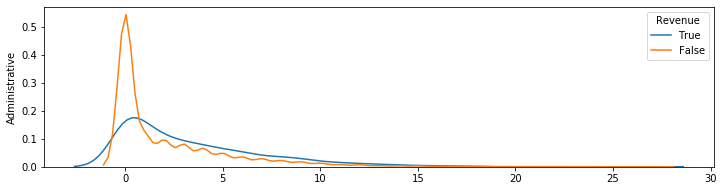

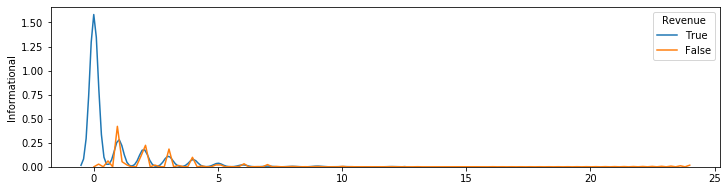

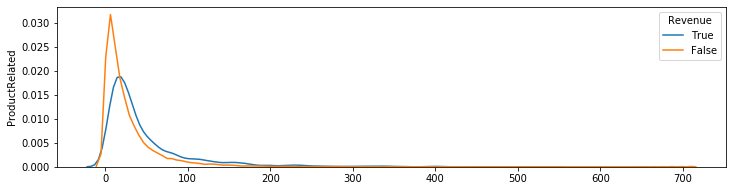

In [7]:
#Visit to pages vs Revenue

plt.figure(figsize=(12,10))

ax1 = plt.subplot(311)
sns.kdeplot(dataEDA[dataEDA.Revenue == True].Administrative)
sns.kdeplot(dataEDA[dataEDA.Revenue == False].Administrative)
plt.ylabel('Administrative')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

plt.figure(figsize=(12,10))
ax2 = plt.subplot(312)
sns.kdeplot(dataEDA[dataEDA.Revenue == True].Informational)
sns.kdeplot(dataEDA[dataEDA.Revenue == False].Informational)
plt.ylabel('Informational')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])
plt.show()

plt.figure(figsize=(12,10))
ax3 = plt.subplot(313)
sns.kdeplot(dataEDA[dataEDA.Revenue == True].ProductRelated)
sns.kdeplot(dataEDA[dataEDA.Revenue == False].ProductRelated)
plt.ylabel('ProductRelated')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])
plt.show()

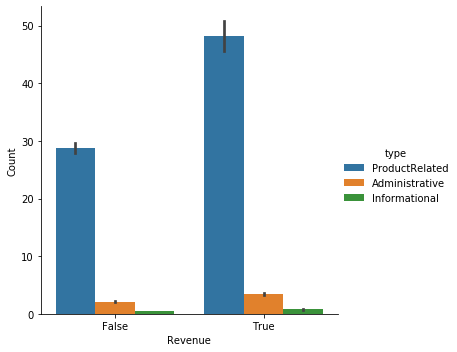

In [18]:
df1 = pd.melt(dataEDA[['ProductRelated','Administrative','Informational','Revenue']], id_vars='Revenue', var_name="type", value_name="Count")
df1
sns.catplot(x='Revenue', y='Count', hue='type', data=df1, kind='bar')

#Inferenced from plots above and below.
#Customers visited ProductRelated web page more as compared to Administrative and Informational.
#At this point of visual EDA it is becoming seemingly clear that Admin page is HOME page, Informational is CONTACT US
#and Product related is the actual webpage for the product in interest. This exclusive info was not provided in the dataset.


In [50]:
#Number of pages visited: Administrative, Informational, ProductRelated
#Percentages of webpages visited

page_time_cols = ["Administrative_Duration","Informational_Duration","ProductRelated_Duration"]
page_count_cols = ["Administrative","Informational","ProductRelated"]
page_count = dataEDA[page_count_cols].groupby(dataEDA.Revenue).mean()
page_count


,Administrative,Informational,ProductRelated
Revenue,,,
False,2.120580,0.452248,28.748943
True,3.393606,0.786164,48.210168


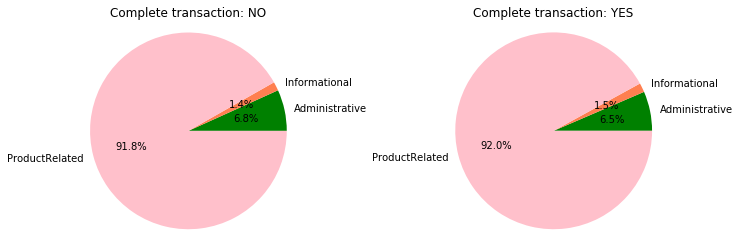

In [56]:
plt.figure(figsize=(12, 4))
                   
plt.subplot(1,2,1)
plt.pie(page_count.iloc[0,:], labels=page_count.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: NO')

plt.subplot(1,2,2)
plt.pie(page_count.iloc[1,:], labels=page_count.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: YES')

plt.show()


#People visit product related pages more rather than Admin or Informational which is obvious
#as user intends to purchase rather than just read admin and info pages on the website.

In [54]:
#Duration spent on each type of webpage
#Percentages of time spent in two classes

page_time = dataEDA[page_time_cols].groupby(dataEDA.Revenue).mean()
page_time


,Administrative_Duration,Informational_Duration,ProductRelated_Duration
Revenue,,,
False,73.834208,30.270759,1071.347468
True,119.483244,57.611427,1876.209615


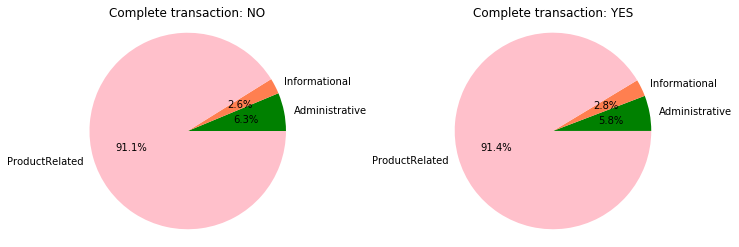

In [55]:
plt.figure(figsize=(12, 4))
                   
plt.subplot(1,2,1)
plt.pie(page_time.iloc[0,:], labels=page_time.columns.str.replace("_Duration",""),
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: NO')

plt.subplot(1,2,2)
plt.pie(page_time.iloc[1,:], labels=page_time.columns.str.replace("_Duration",""),
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: YES')

plt.show()


#on average, people who complete transactions visit more webpages, and spend more time on these webpages.
#doesn't seem to be a clear difference in the type of webpage visited between people who complete 
#the purchase and those who don't.

C:\Users\neera\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\neera\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



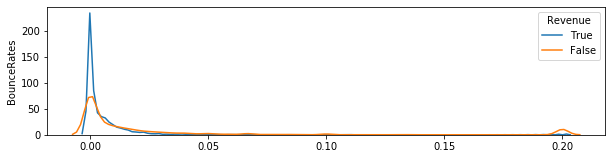

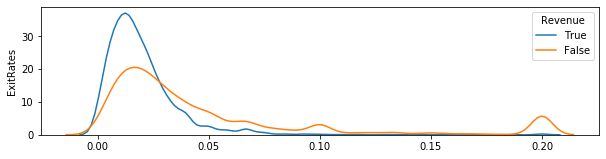

In [19]:
#BounceRates and ExitRates vs Revenue

plt.figure(figsize=(10,8))
ax1 = plt.subplot(311)
sns.kdeplot(dataEDA[dataEDA.Revenue == True].BounceRates)
sns.kdeplot(dataEDA[dataEDA.Revenue == False].BounceRates)
plt.ylabel('BounceRates')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

plt.figure(figsize=(10,8))
ax2 = plt.subplot(312)
sns.kdeplot(dataEDA[dataEDA.Revenue == True].ExitRates)
sns.kdeplot(dataEDA[dataEDA.Revenue == False].ExitRates)
plt.ylabel('ExitRates')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])
plt.show()


#From the below plot its clear that Customers with low exit rate and low bounce rate generated more revenue.

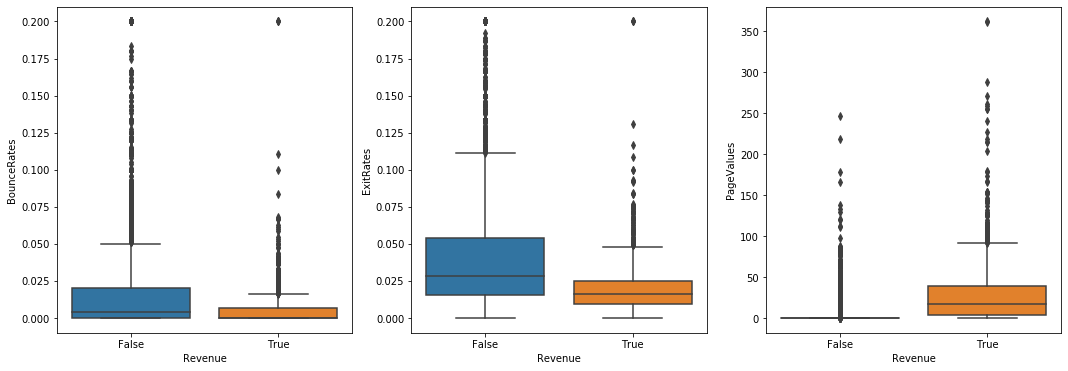

In [60]:
#Google Analytics metrics explore

plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
sns.boxplot(y="BounceRates", x="Revenue",data=dataEDA)
plt.subplot(1,3,2)
sns.boxplot(y="ExitRates", x="Revenue",data=dataEDA)
plt.subplot(1,3,3)
sns.boxplot(y="PageValues",x="Revenue", data=dataEDA)
plt.show()

#For effective revenue genration low bounce rates, low exit rates and high page values hold the key.
#focus on this combo can give good dividends


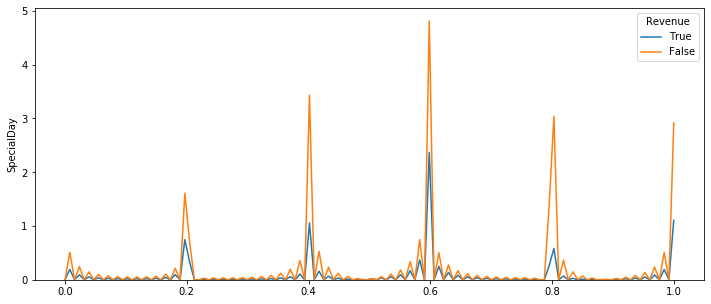

In [20]:
# Special Day vs Revenue

plt.figure(figsize=(12,5))
sns.kdeplot(dataEDA[dataEDA.Revenue == True].SpecialDay)
sns.kdeplot(dataEDA[dataEDA.Revenue == False].SpecialDay)
plt.ylabel('SpecialDay')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

#From below closeness to Special Day is not having much affect on revenue generation.

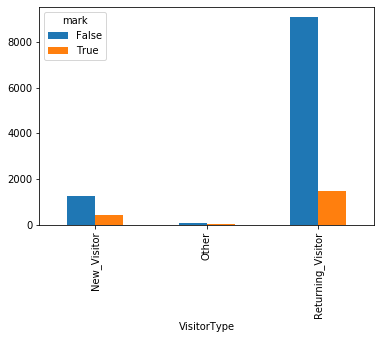

In [22]:
#Revenue vs VisitorType
ct = pd.crosstab(dataEDA.VisitorType,dataEDA.Revenue)
ct.plot.bar()
plt.legend(title='mark')

#Inference from below
#Most of the customers visiting the website are Returning visistors, contributing to most number of purchases.
#About 1/4th of New_visitors made the purchase as compared to ~15 % of Returning visitors.


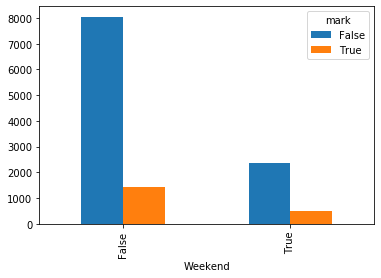

In [23]:
#Weekend vs Revenue

ct1 = pd.crosstab(dataEDA.Weekend,dataEDA.Revenue)
ct1.plot.bar()
plt.legend(title='mark')

#It is evident from below that even though the no of visitors in weekdays are more compared to weekends but 
#there is no significant difference in conversion to Revenue rates.

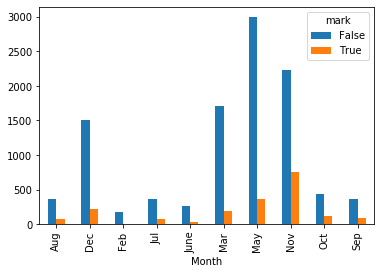

In [24]:
#Month vs Revenue

ct2 = pd.crosstab(dataEDA.Month,dataEDA.Revenue)
ct2.plot.bar()
plt.legend(title='mark')

#Insights from below
#Most of the customers visited the website in the month of May and Nov with pretty much similar conversion to Revenue ratio.
#Highest number of purchases have been made in the month of November.
#Website is least visited by customers in the month of Feb and also the purchase is negligible as compared to other months.

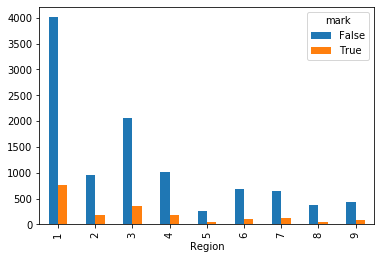

In [25]:
#Region vs Revenue

ct4 = pd.crosstab(dataEDA.Region,dataEDA.Revenue)
ct4.plot.bar()
plt.legend(title='mark')

#Most revenue is generated from Region 1 followed by region 3.
#Regions 5 and 8 have negligble contribution in revenue generation.

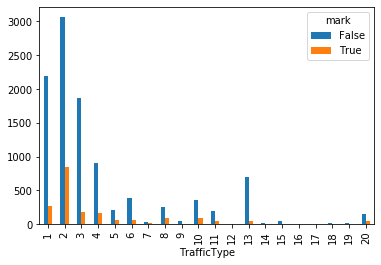

In [26]:
#TrafficType vs Revenue

ct5 = pd.crosstab(dataEDA.TrafficType,dataEDA.Revenue)
ct5.plot.bar()
plt.legend(title='mark')

#Most revenue is generated by traffic type 2, followed by 1 and 3.
#TRafffic type 14-20 have very less contribution to Revenue.

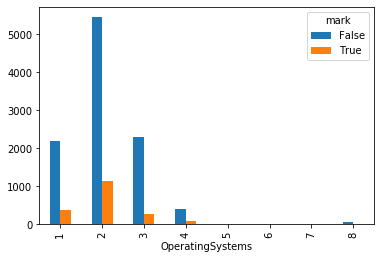

In [33]:
#OS vs REvenue

ct6 = pd.crosstab(dataEDA.OperatingSystems,dataEDA.Revenue)
ct6.plot.bar()
plt.legend(title='mark')

#People using OS type 2 generate majority of revenue.

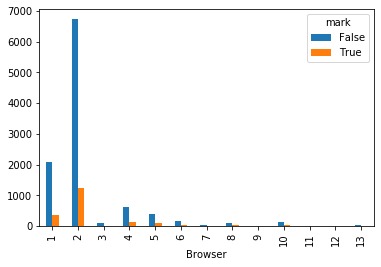

In [34]:
#Browser vs Revenue


ct7 = pd.crosstab(dataEDA.Browser,dataEDA.Revenue)
ct7.plot.bar()
plt.legend(title='mark')

#Most revenue is generated from browser 2 and 1.No contribution from browsers 3,9,11,12,13.

Text(0.5, 1, 'Type of traffic on the website')

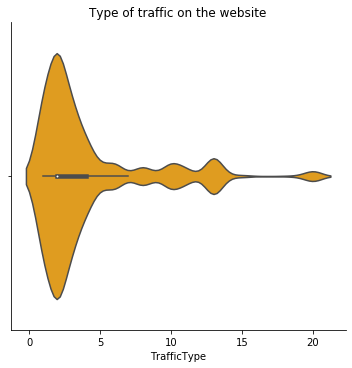

In [44]:
#TYpe of traffic coming on the website

sns.catplot(x="TrafficType", data=dataEDA, kind='violin',color='orange')
plt.title("Type of traffic hitting the website")

#Most of the traffic hitting the website belongs to 1-5 bracket.

Text(0.5, 1.0, 'Effect of special days on the website')

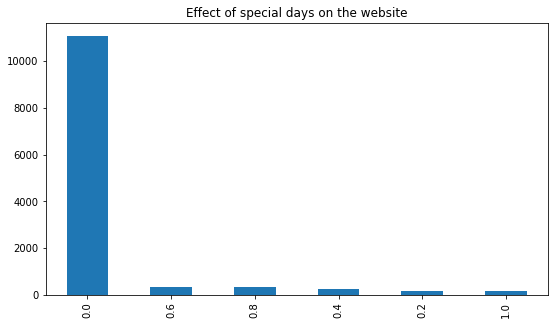

In [45]:
#Effect of special day on website

dataEDA.SpecialDay.value_counts().plot.bar(figsize=(9,5))
plt.title("Effect of special days on the website")

#The users have low impact on special days.

Text(0.5, 1.0, 'Monthly visits of the users on the website')

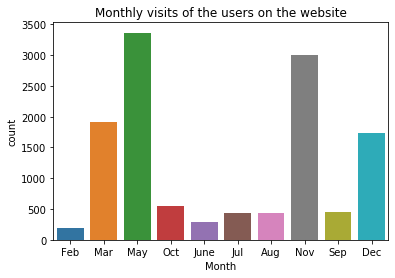

In [48]:
#Visits to the website on each month

sns.countplot(x="Month",data=dataEDA)
plt.title("Monthly visits of the users on the website")

#People visited the website in the month of May and Nov the most.

In [69]:
#Demographics of visitors: VisitorType, Region

freq1 = dataEDA.VisitorType.groupby(dataEDA.Revenue).value_counts()
freq1 = freq1.unstack(level='Revenue').fillna(0).transpose()
print(freq1)

VisitorType  New_Visitor  Other  Returning_Visitor
Revenue                                           
False               1272     69               9081
True                 422     16               1470


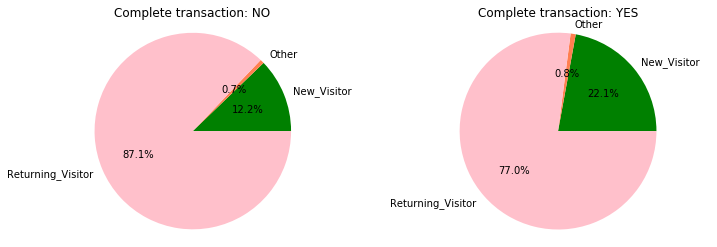

In [70]:
plt.figure(figsize=(12, 4))
                   
plt.subplot(1,2,1)
plt.pie(freq1.iloc[0,:], labels=freq1.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: NO')

plt.subplot(1,2,2)
plt.pie(freq1.iloc[1,:], labels=freq1.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['green', 'coral', 'pink'])
plt.axis('equal')
plt.title('Complete transaction: YES')

plt.show()

#New visitors take up a larger percentage in those who complete purchase,
#while there are more returning visitors among those who do not complete the purchase.

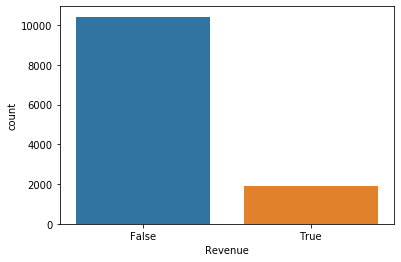

In [75]:
#Checking share of completed purchases

sns.countplot(data=dataEDA,x="Revenue")

#roughly around 20% of the sessions only resulted in completed purachase.
#imbalanced dataset might have to do something about it before model building.

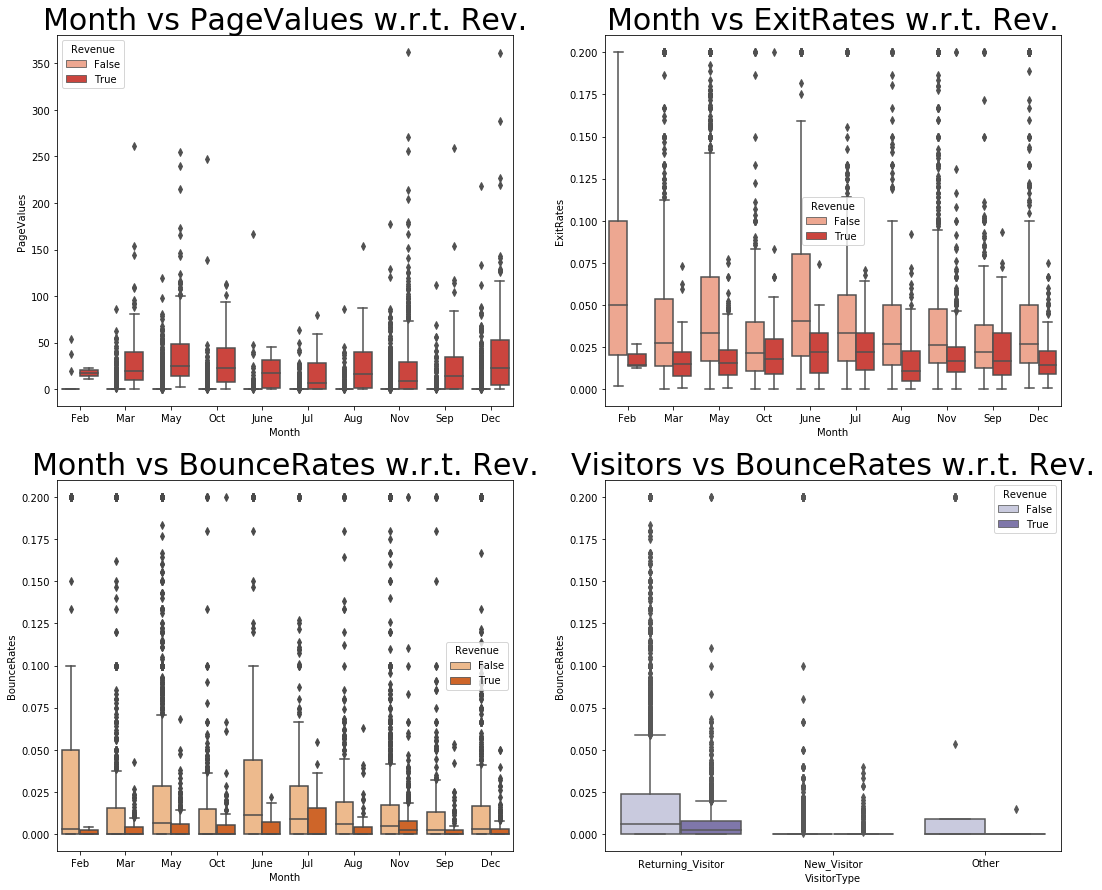

In [4]:
#Multivariate Analyses 1

# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = dataEDA['Month'], y = dataEDA['PageValues'], hue = dataEDA['Revenue'], palette = 'Reds')
plt.title('Month vs PageValues w.r.t. Rev.', fontsize = 30)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = dataEDA['Month'], y = dataEDA['ExitRates'], hue = dataEDA['Revenue'], palette = 'Reds')
plt.title('Month vs ExitRates w.r.t. Rev.', fontsize = 30)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = dataEDA['Month'], y = dataEDA['BounceRates'], hue = dataEDA['Revenue'], palette = 'Oranges')
plt.title('Month vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = dataEDA['VisitorType'], y = dataEDA['BounceRates'], hue = dataEDA['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

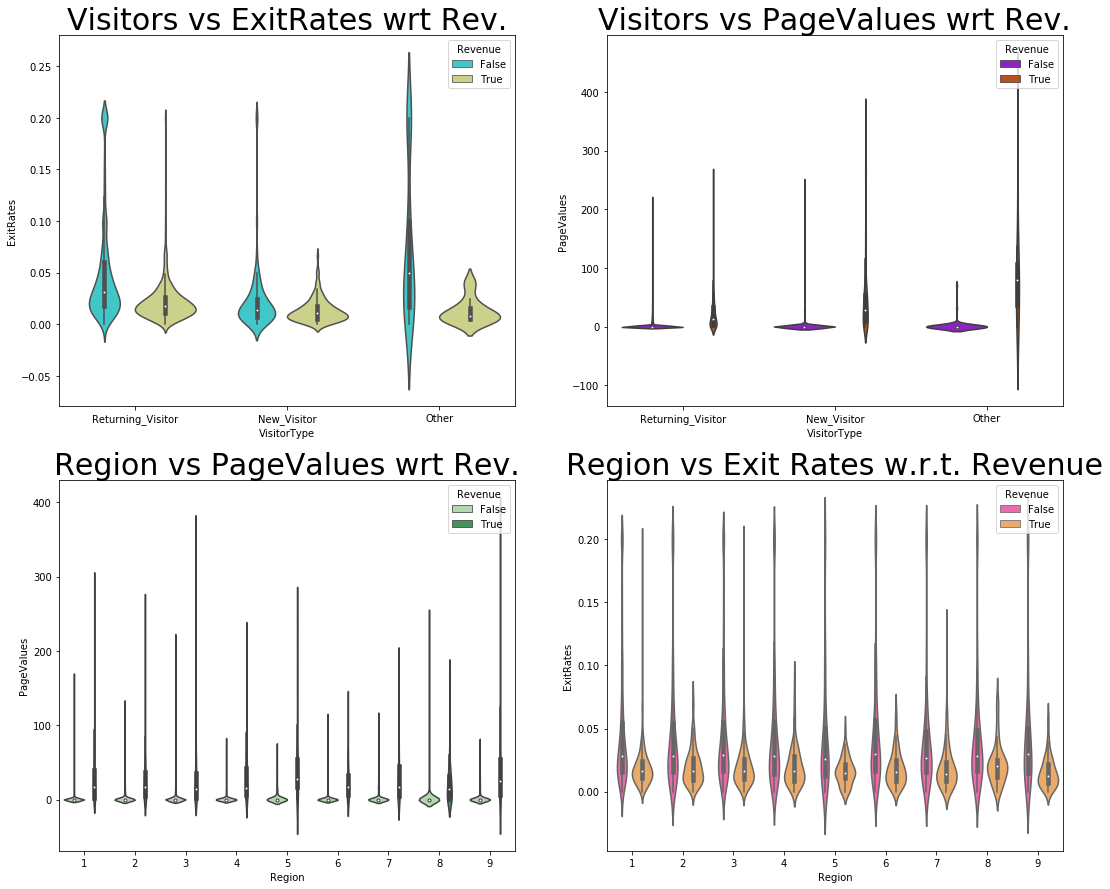

In [80]:
#Multivariate analysis 2

# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = dataEDA['VisitorType'], y = dataEDA['ExitRates'], hue = dataEDA['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = dataEDA['VisitorType'], y = dataEDA['PageValues'], hue = dataEDA['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)

# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = dataEDA['Region'], y = dataEDA['PageValues'], hue = dataEDA['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = dataEDA['Region'], y = dataEDA['ExitRates'], hue = dataEDA['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()

In [ ]:
#Hypothesis 8: Which month has most special days
month_with_special=(pd.crosstab(dataEDA["Month"],dataEDA["SpecialDay"],margins=True).apply(percentage, axis=1))
month_with_special
month_with_special.plot.bar(stacked=True)
plt.title('Months with special days')
plt.ylabel('Special Day')

In [ ]:
sns.lmplot('Administrative', 'Administrative_Duration', hue='Revenue', data=dataEDA)
plt.title("Administrative vs Administrative_Duration vs Revenue")
plt.show()

In [ ]:
sns.lmplot('Informational', 'Informational_Duration', hue='Revenue', data=dataEDA)
plt.title("Informational vs Informational_Duration vs Revenue")
plt.show()

In [ ]:
sns.lmplot('ProductRelated', 'ProductRelated_Duration', hue='Revenue', data=dataEDA)
plt.title("ProductRelated vs ProductRelated_Duration vs Revenue")
plt.show()

In [ ]:
sns.lmplot('PageValues', 'ProductRelated',hue='Revenue', data=dataEDA)
plt.title("PageValues vs ProductRelated vs Revenue")
plt.show()